# Homework 5: Sample t and U tests

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

In [2]:
import numpy as np
import pandas as pd
import random

def tvalue_1Samp(sample, mu):
    n = len(sample)
    X = np.mean(sample)
    S = np.std(sample, ddof=1)
    t = np.sqrt(n)*(X - mu)/S
    return t

def tvalue_2Samp(sample1, sample2):
    y = np.concatenate((sample1, sample2))
    x = np.concatenate((np.ones(len(sample1)), np.zeros(len(sample2))))
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.tvalues[1]

def t_distribution(data, s, onesample=True, L=25000):
    μ = np.mean(data)
    data = data.tolist()
    randcollect = lambda data, s: random.sample(data, k=s)
    if onesample:
        dist = [tvalue_1Samp(randcollect(data, s), μ) for j in range(1, L)]
    else:
        dist = [tvalue_2Samp(randcollect(data, s), randcollect(data, s)) for j in range(1, L)]
    return dist


In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

mu = 195
sigma = 10
N = 1000
norm_data = np.random.normal(mu, sigma, N)
unif_data = np.random.uniform(0, mu, N)
nsmps = [3, 8, 10]

keywords = ['t values', 'distribution type', 'n_samples']
df = pd.DataFrame([], columns=keywords)
n_samples = [str(n) for n in nsmps]
for data, datatype in zip((norm_data, unif_data), ('Normal', 'Uniform')):
    
    for s in n_samples:
        tdist = t_distribution(data, int(s), onesample=True, L=500)
        L = len(tdist)
        datatype_ls = [datatype] * L
        nsample_ls = [s] * L
        matrix = np.array([tdist, datatype_ls, nsample_ls]).T
        df = pd.concat([df, pd.DataFrame(matrix, columns=keywords)])
        
df['t values'] = df['t values'].astype(float)

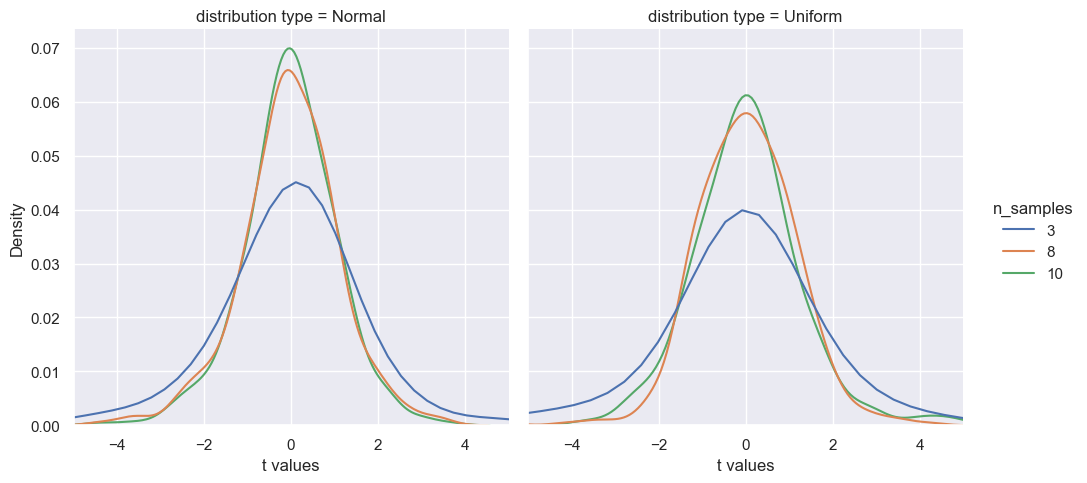

In [4]:
sns.displot(data=df, x="t values", hue="n_samples", col="distribution type", kind="kde")
plt.xlim(-5, 5)
plt.show()

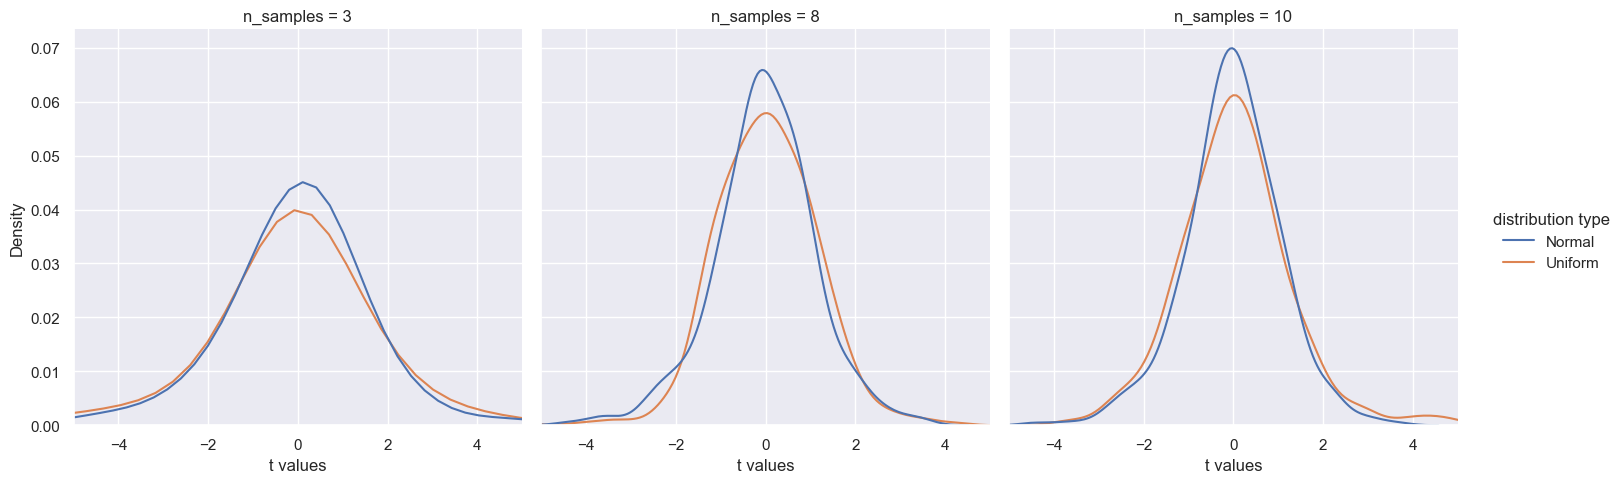

In [7]:
sns.displot(data=df, x="t values", hue="distribution type", col="n_samples", kind="kde")
plt.xlim(-5, 5)
plt.show()

***